# 2-NLP-Şiir Sınıflandırması

In [1]:
# Proje içinde ihtiyacımız olan Kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)

from textblob import TextBlob
#her kelime pozitif veya negatif bir değer alır

#Dil tespit etmek için
from langdetect import detect

#Sentiment analiz yapmak için
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Resim eklemek için
import os
from PIL import Image

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

Elbette, NLP (Doğal Dil İşleme) projenizin aşamalarını adım adım anlatalım:

1. **Veri İncelemesi ve Düzenlenmesi:**
   İlk olarak, `df` olarak tanımladığınız veri çerçevesini incelemeniz ve temizlemeniz gerekecektir. Veri çerçevesinin başlık sütununu inceleyerek projenizin içeriğini anlayabilirsiniz. Verilerinizi inceledikten sonra gerektiğinde metin verilerini temizlemek için veri ön işleme adımlarını uygulayabilirsiniz. Bu adımlar, metin verilerinden gereksiz karakterleri, boşlukları veya özel işaretleri temizlemeyi içerebilir.

2. **Duygu Analizi (Sentiment Analysis):**
   Duygu analizi, metin verilerindeki duygusal tonları belirlemek için kullanılan bir NLP yöntemidir. Projede kullanacağınız verilerdeki metinlerin duygusal tonlarını (olumlu, olumsuz veya nötr) belirlemek için bir duygu analizi modeli geliştirebilirsiniz. Bu, metinlerin içerdikleri duygu veya hissiyat hakkında fikir sahibi olmanıza yardımcı olabilir.
   
3. **Görselleştirme:**
   Verilerinizi daha iyi anlamak ve içgörüler elde etmek için görselleştirme tekniklerini kullanabilirsiniz. Örneğin, metin verilerinizdeki en sık geçen kelimeleri ve terimleri görselleştirmek için bir kelime bulutu (word cloud) oluşturabilirsiniz. Ayrıca, metin verilerinizi sınıflandırmak veya gruplandırmak için görselleştirmeler de yapabilirsiniz.

4. **Modelleme:**
   NLP projenizde metin madde başlıklarını veya içeriğini analiz etmek veya sınıflandırmak istiyorsanız, makine öğrenimi modellerini kullanabilirsiniz. Öncelikle verilerinizi eğitim ve test veri setlerine bölmelisiniz. Ardından, metin madde başlıklarını veya içeriklerini sınıflandırmak için bir sınıflandırma modeli (örneğin, çok sınıflı sınıflandırma için çok sınıflı sınıflandırma algoritmaları) geliştirebilirsiniz.

5. **Sonuçların İncelemesi ve Sunumu:**
   Oluşturduğunuz modelin performansını değerlendirmeniz ve sonuçları analiz etmeniz gerekecektir. Doğruluk, hassasiyet, gerçek pozitif ve yanlış pozitif oranları gibi model değerlendirme metriklerini kullanarak modelinizi değerlendirin. Projeyi sonuçlandırırken bulgularınızı ve gözlemlerinizin bir özetini sunun.

## 1. **Veri İncelemesi ve Düzenlenmesi:**

In [12]:
import pandas as pd

# İlk CSV dosyasını yükle
df_train = pd.read_csv("Poem_classification - train_data.csv")

# İkinci CSV dosyasını yükle
df_test = pd.read_csv("Poem_classification - test_data.csv")

# Veri çerçevelerini birleştir
df = pd.concat([df_train, df_test], ignore_index=True)

In [13]:
df.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [14]:
df.shape

(991, 2)

In [16]:
df["Genre"].value_counts()

Environment    252
Music          251
Death          247
Affection      241
Name: Genre, dtype: int64

In [19]:
df.isnull().sum()

Genre    0
Poem     4
dtype: int64

In [20]:
df = df.dropna(subset=['Poem']).rename(columns={'Poem': 'text'})

In [21]:
df.sample(2)

,Genre,text
173,Music,the gone did not go so that we’d endure plucki...
791,Environment,The please freak And the likeness monster Foll...


1. **Tüm Harfleri Küçük Harfe Çevirme**: Metin verilerindeki tüm harf karakterlerini küçük harfe çevirmek, metin verilerinin tutarlılığını sağlar ve büyük harfle başlayan ve küçük harfle başlayan kelimeleri aynı olarak kabul eder.

2. **Noktalama İşaretlerini Kaldırma**: Metin verilerinden noktalama işaretlerini kaldırmak, metin maddeyi temizlemeye yardımcı olur ve dil işleme algoritmalarının daha iyi çalışmasını sağlar. Örnekler: nokta (.), virgül (,), ünlem (!), soru işareti (?), tırnak işaretleri (' ve ").

3. **Rakamları Kaldırma**: Metin verilerinden rakamları kaldırmak da verileri temizlemeye yardımcı olur. Bu, metni analiz etmek için rakamların gerekli olmadığı durumlarda özellikle önemlidir.

4. **Satır Sonlarını Kaldırma**: Metin verilerindeki satır sonlarını veya yeni satırları kaldırmak, metin verilerini tek bir sürekli metin olarak birleştirmeye yardımcı olur.

5. **Gereksiz Kelimeleri Çıkartma (Stopwords)**: Dil işleme için genellikle anlam taşımayan, yaygın kullanılan kelimeleri (örneğin "ve", "ama", "veya") çıkartmak için bir stopwords listesi kullanılır. Bu, metin maddeyi temizlerken verilerin önemli kısımlarını korumanıza yardımcı olur.

6. **Tokenize Etme**: Metin verilerini kelime veya kelime gruplarına ayırmak için tokenizasyon yapılır. Tokenler, metin verilerini işlemek ve analiz etmek için kullanılan temel birimlerdir.

7. **Ekleri Kaldırma ve Kökleri Bulma (Lemma & Stemma)**: Dil işleme için metin verilerini daha basit bir forma dönüştürmek için lemmatizasyon veya stemming kullanabilirsiniz. Lemmatizasyon, kelimeleri köklerine dönüştürürken, stemming benzer kelimeleri daha basit bir köke indirir.

8. **Vektörleştirme**: Metin verilerini sayısal bir forma dönüştürmek için vektörleştirme yapılır. Bu, metin verilerini bir sayısal vektör temsilinde ifade etmek için teknikler içerir. TF-IDF (Term Frequency-Inverse Document Frequency) veya Word Embedding (örneğin Word2Vec, GloVe) gibi teknikler kullanılabilir.

In [22]:
# 1-Küçük harfe çevir
df['text']=df['text'].str.lower()
# 2-Noktalama işaretleri kaldır
df['text']=df['text'].str.replace('[^\w\s]','')
# 3-Rakamları kaldır
df['text']=df['text'].str.replace('\d+','')
# 4-Satır sonu,\n enter a basılmışsa \r
df['text']=df['text'].str.replace('\n',' ').replace('\r','')

In [23]:
# Gereksiz Kelimeleri Çıkartma (Stopwords)
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df['text']=df['text'].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))

In [24]:
# Tokenize Etme
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(i) for i in df['text'].values]

In [25]:
# Ekleri Kaldırma ve Kökleri Bulma (Lemma & Stemma)
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in df['text'].values]

In [26]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [27]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

## 2. **Duygu Analizi (Sentiment Analysis):**

In [28]:
# Polarity / Subjectivity
from textblob import TextBlob
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [29]:
df.sample(3)

,Genre,text,tokenized,lemmatize,polarity,subjectivity
609,Affection,never except thirty seconds year ecstasy comin...,"[never, except, thirty, seconds, year, ecstasy...","[n, e, v, e, r, , e, x, c, e, p, t, , t, h, ...",-0.261905,0.52381
171,Music,doctor says empty room thereand isa pale sack ...,"[doctor, says, empty, room, thereand, isa, pal...","[d, o, c, t, o, r, , s, a, y, s, , e, m, p, ...",0.047500,0.54500
723,Environment,like animals moving dailythrough open fieldit ...,"[like, animals, moving, dailythrough, open, fi...","[l, i, k, e, , a, n, i, m, a, l, s, , m, o, ...",0.075000,0.43750


In [32]:
# yukarıda çıkan sonuçları tek rakama dönüştürelim
df.loc[df['subjectivity']>0.5,'sentiment']=1 #pozitive
df.loc[df['subjectivity']==0.5,'sentiment']=0 #neutral
df.loc[df['subjectivity']<0.5,'sentiment']=-1 #negative
df.sample(3)

,Genre,text,tokenized,lemmatize,polarity,subjectivity,sentiment
32,Music,leftunaccounted forelegance marriedto rust roo...,"[leftunaccounted, forelegance, marriedto, rust...","[l, e, f, t, u, n, a, c, c, o, u, n, t, e, d, ...",0.472222,0.5,0.0
12,Music,ntozake shangei used roller coaster girl time...,"[ntozake, shangei, used, roller, coaster, girl...","[n, t, o, z, a, k, e, , s, h, a, n, g, e, i, ...",0.000000,0.0,-1.0
964,Affection,love remains kind present tense describe scene...,"[love, remains, kind, present, tense, describe...","[l, o, v, e, , r, e, m, a, i, n, s, , k, i, ...",0.191667,0.5,0.0


In [31]:
df.sentiment.value_counts()

-1.0    590
 1.0    363
 0.0     34
Name: sentiment, dtype: int64

## 3. **Görselleştirme:**

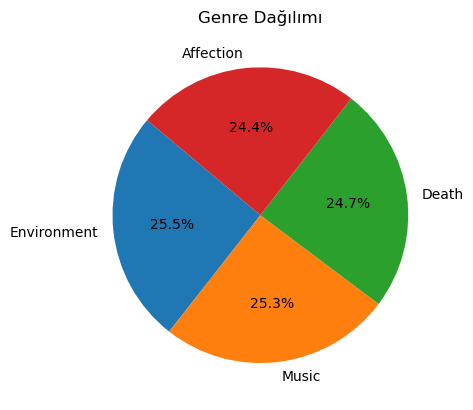

In [33]:
# Genre sütununun dağılımını daire grafiği ile gösterme
genre_counts = df['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Dağılımı')
plt.show()

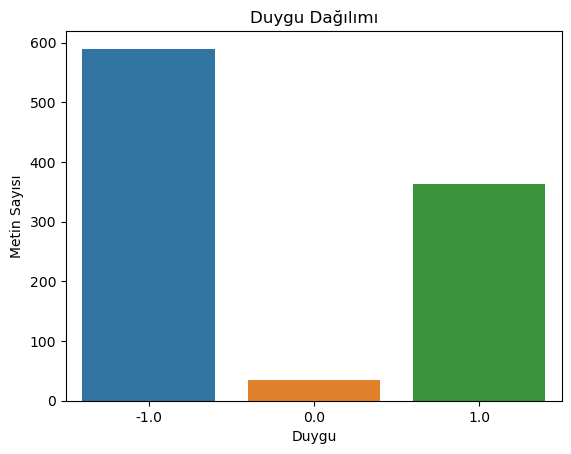

In [34]:
sns.countplot(x='sentiment', data=df)
plt.title('Duygu Dağılımı')
plt.xlabel('Duygu')
plt.ylabel('Metin Sayısı')
plt.show()

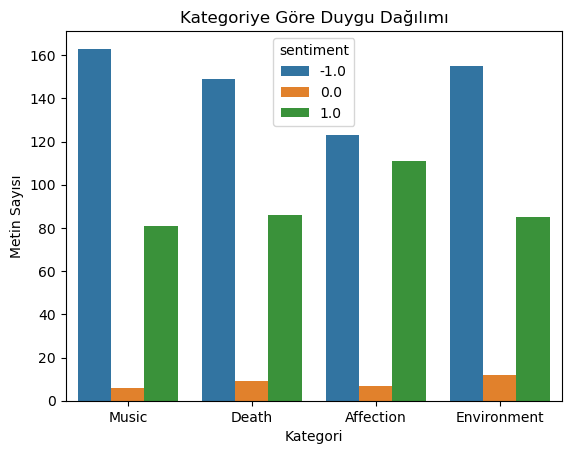

In [35]:
sns.countplot(x='Genre', hue='sentiment', data=df)
plt.title('Kategoriye Göre Duygu Dağılımı')
plt.xlabel('Kategori')
plt.ylabel('Metin Sayısı')
plt.show()

### WOrdCloud

In [38]:
pozitif=df[df["subjectivity"]>0.5]["text"]
negatif=df[df["subjectivity"]<0.5]["text"]
nötr=df[df["subjectivity"]==0.5]["text"] 

In [49]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("brain.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

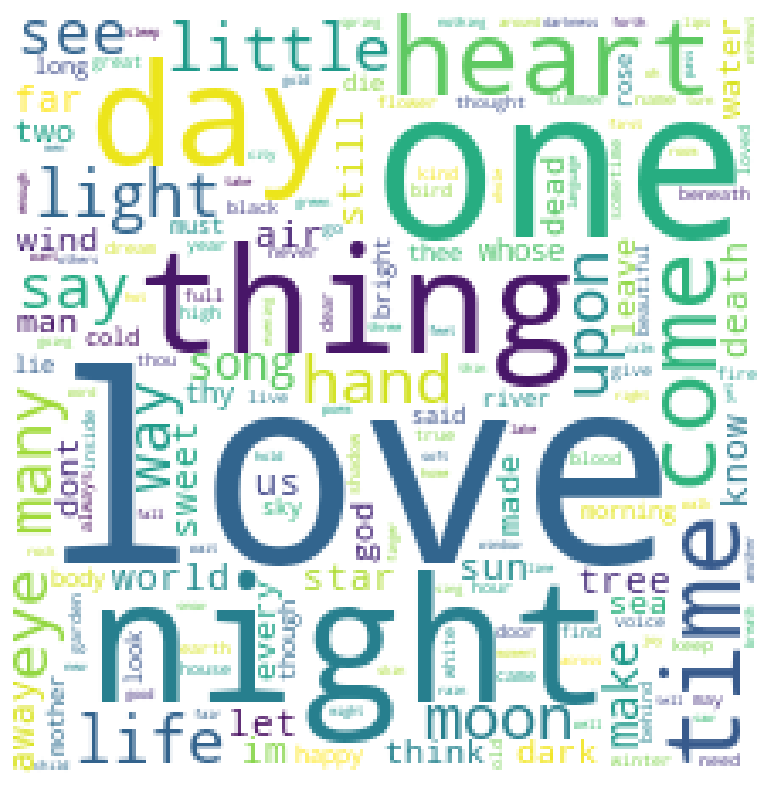

In [50]:
wc(pozitif,"white")

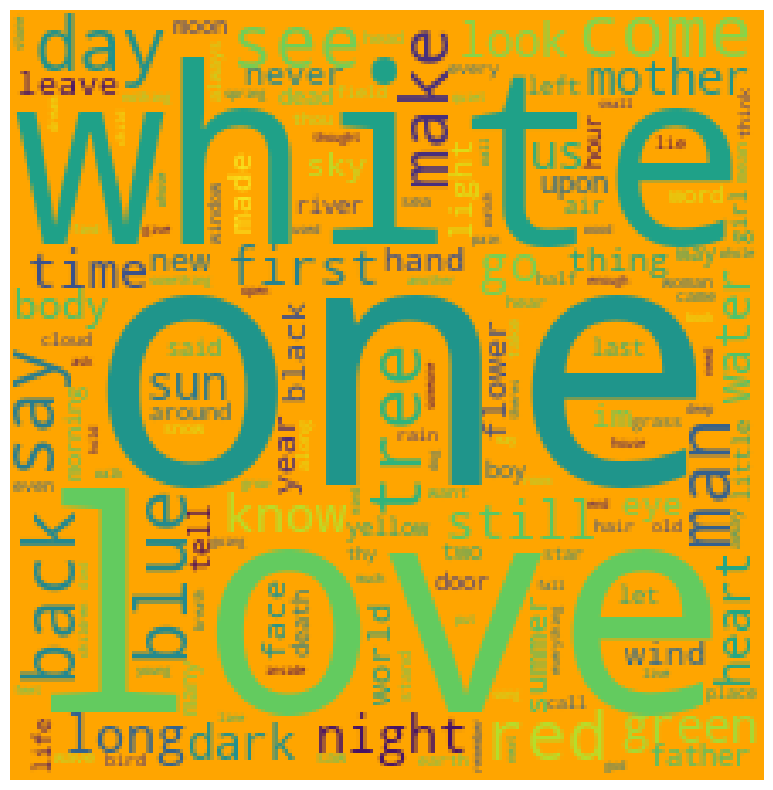

In [51]:
wc(negatif,"orange")

In [52]:
df.head(3)

,Genre,text,tokenized,lemmatize,polarity,subjectivity,sentiment
1,Music,thick brushthey spend hottest pa...,"[thick, brushthey, spend, hottest, part, day, ...","[ , , , , , , , , , , , , , , t, ...",-0.300000,0.475000,-1.0
2,Music,storms generous ...,"[storms, generous, something, easy, surrender,...","[ , , , s, t, o, r, m, s, , g, e, n, e, r, ...",-0.033333,0.916667,1.0
3,Music,ana mendieta carry around matin star hold for...,"[ana, mendieta, carry, around, matin, star, ho...","[ , a, n, a, , m, e, n, d, i, e, t, a, , c, ...",0.000000,0.000000,-1.0


In [53]:
df["sentiment"].value_counts()

-1.0    590
 1.0    363
 0.0     34
Name: sentiment, dtype: int64

In [54]:
# "sentiment" sütunundaki değerleri yeniden etiketle
df['result'] = df['sentiment'].map({-1: 'negatif', 0: 'nötr', 1: 'pozitif'})
df.head()

,Genre,text,tokenized,lemmatize,polarity,subjectivity,sentiment,result
1,Music,thick brushthey spend hottest pa...,"[thick, brushthey, spend, hottest, part, day, ...","[ , , , , , , , , , , , , , , t, ...",-0.300000,0.475000,-1.0,negatif
2,Music,storms generous ...,"[storms, generous, something, easy, surrender,...","[ , , , s, t, o, r, m, s, , g, e, n, e, r, ...",-0.033333,0.916667,1.0,pozitif
3,Music,ana mendieta carry around matin star hold for...,"[ana, mendieta, carry, around, matin, star, ho...","[ , a, n, a, , m, e, n, d, i, e, t, a, , c, ...",0.000000,0.000000,-1.0,negatif
4,Music,aja sherrard portent may memory wallace steve...,"[aja, sherrard, portent, may, memory, wallace,...","[ , a, j, a, , s, h, e, r, r, a, r, d, , p, ...",-0.291667,0.541667,1.0,pozitif
5,Music,bob marley bavaria november brilliant mornin...,"[bob, marley, bavaria, november, brilliant, mo...","[ , b, o, b, , m, a, r, l, e, y, , b, a, v, ...",0.650000,0.850000,1.0,pozitif


## 4. **Modelleme:**

In [55]:
# Vektörleştirme
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [56]:
x=df.text
y=df.result

In [57]:
x=vect.fit_transform(x)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [59]:
mb=MultinomialNB()

In [60]:
mb.fit(x_train,y_train)

MultinomialNB()

In [61]:
pred=mb.predict(x_test)

In [62]:
accuracy_score(pred,y_test)

0.7181208053691275

#### Diğer Modellemeler

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Veriyi hazırla
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words="english", ngram_range=(1, 2), analyzer=lemmafn)
x = df['text']
y = df['result']
x = tfidf_vectorizer.fit_transform(x).toarray()  # Seyrek matrisi yoğun bir matrise dönüştür

# Sınıf etiketlerini sayısal değerlere dönüştür
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Veriyi eğitim ve test kümesine ayır
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.15)

# Sınıflandırma modellerini tanımla
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'XGBClassifier': XGBClassifier()
}

# Modelleri değerlendir
results = {'Model': [], 'Accuracy': []}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)

# Sonuçları bir DataFrame'e dök
results_df = pd.DataFrame(results)

# Sonuçları doğruluk (accuracy) sırasına göre sırala
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Sonuçları yazdır
print(results_df)


                    Model  Accuracy
6      LogisticRegression  0.798658
7           XGBClassifier  0.778523
2                     SVC  0.765101
5  RandomForestClassifier  0.758389
1             BernoulliNB  0.738255
4  DecisionTreeClassifier  0.684564
3    KNeighborsClassifier  0.651007
0              GaussianNB  0.597315


## Model Deneme:

In [67]:
df["result"].value_counts()

negatif    590
pozitif    363
nötr        34
Name: result, dtype: int64

In [69]:
from textblob import TextBlob
import pandas as pd

# Metin maddelemesi işlevi
def lemmafn(text):
    blob = TextBlob(text)
    return " ".join([word.lemma for word in blob.words])

# Kullanıcıdan bir metin girdisi al
user_text = input("Enter a Text: ")

# Kullanıcının metin girdisini maddele ve dönüştür
user_text_lemma = lemmafn(user_text)

# Kullanıcının metin girdisini TfidfVectorizer ile dönüştür
user_data = tfidf_vectorizer.transform([user_text_lemma]).toarray()

# Tahminde bulun
predicted_label = model.predict(user_data)

# Tahmin sonucunu yazdır
if predicted_label[0] == 0:
    print("Prediction: negatif")
elif predicted_label[0] == 1:
    print("Prediction: pozitif")
else:
    print("Prediction: nötr")

Enter a Text: And this maiden she lived with no other thought Than to love and be loved by me.
Prediction: nötr


In [71]:
# Kullanıcıdan bir metin girdisi al
user_text = input("Enter a Text: ")

# Kullanıcının metin girdisini maddele ve dönüştür
user_text_lemma = lemmafn(user_text)

# Kullanıcının metin girdisini TfidfVectorizer ile dönüştür
user_data = tfidf_vectorizer.transform([user_text_lemma]).toarray()

# Tahminde bulun
predicted_label = model.predict(user_data)

# Tahmin sonucunu yazdır
if predicted_label[0] == 0:
    print("Prediction: negatif")
elif predicted_label[0] == 1:
    print("Prediction: pozitif")
else:
    print("Prediction: nötr")

Enter a Text: The angels, not half so happy in Heaven, Went envying her and me
Prediction: negatif


## 5. **Sonuçların İncelemesi ve Sunumu:**

"Bu proje, doğal dil işleme (NLP) tekniklerini kullanarak metin verilerini analiz etmeyi, görselleştirmeyi ve duygu analizi yapmayı içeriyordu. Veri maddeleştirmesi ile metin verilerini işlemeye başladık, ardından duygu analizi için bir model eğittik. Ayrıca, kullanıcıdan metin girdisi alarak gerçek zamanlı tahminlerde bulunma yeteneğini uyguladık. Bu proje, NLP ve metin analizi konularında önemli bir anlayış kazandırmıştır."